In [2]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
import seaborn as sns
import os
import pickle
import matplotlib 
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import sklearn

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import imblearn as imb
# print("imblearn version: ",imblearn.__version__)

from sklearn.metrics import confusion_matrix
import itertools

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

import sys
sys.path.append('../../')
# import utils
from sklearn.model_selection import GridSearchCV
from VisUtils import *
from split_data import *
from RF_GSCV import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Load in the data 
split_path = '../../../../../data/NEK_data_4Berkeley/NEK2/' # This was my local path, change the split_path to correct data dir

train_x_df_temp = pd.read_csv(split_path+"bind_train_x_UNDER.csv",header=None)
train_y_df_temp = pd.read_csv(split_path+"bind_train_y_UNDER.csv",header=None)
test_x_df = pd.read_csv(split_path+"bind_test_x_UNDER.csv",header=None)
test_y_df = pd.read_csv(split_path+"bind_test_y_UNDER.csv",header=None)

train_x_temp = train_x_df_temp.to_numpy().astype("long")
test_x_temp = test_x_df.to_numpy().astype("long")

train_y_temp = train_y_df_temp.to_numpy().flatten().astype("long")
test_y_temp = test_y_df.to_numpy().flatten().astype("long")

train_x = torch.from_numpy(train_x_temp)
train_y = torch.from_numpy(train_y_temp)
test_x = torch.from_numpy(test_x_temp)
test_y = torch.from_numpy(test_y_temp)


print(train_x.shape) 
print(train_y.shape) 

torch.Size([90, 306])
torch.Size([90])


TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.656, precision: 0.095, recall: 0.833, specificity: 0.648
TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.635, precision: 0.097, recall: 0.917, specificity: 0.622


<Figure size 600x400 with 0 Axes>

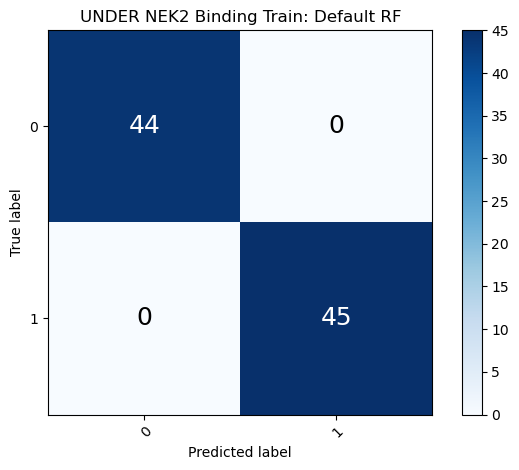

<Figure size 600x400 with 0 Axes>

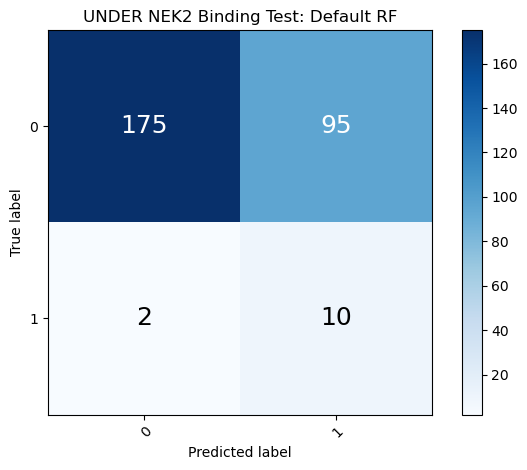

<Figure size 600x400 with 0 Axes>

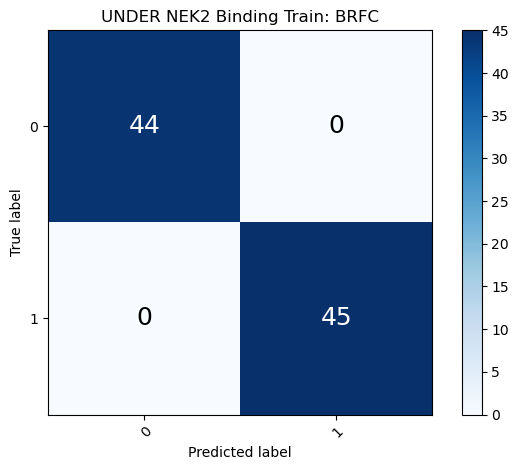

<Figure size 600x400 with 0 Axes>

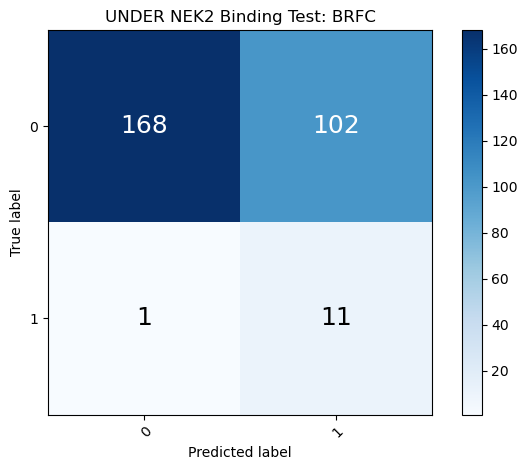

In [7]:
# Try out a few random forest models
rf_trial1 = rf_models(train_x, train_y, test_x, test_y, 'basic RF', {})
plot_confusion_matrix(train_y, rf_trial1['train_pred'], ['0','1'], title='UNDER NEK2 Binding Train: Default RF')
plot_confusion_matrix(test_y, rf_trial1['test_pred'], ['0','1'], title='UNDER NEK2 Binding Test: Default RF')

rf_trial2 = rf_models(train_x, train_y, test_x, test_y, 'BalancedRandomForestClassifier', {})
plot_confusion_matrix(train_y, rf_trial2['train_pred'], ['0','1'], title='UNDER NEK2 Binding Train: BRFC')
plot_confusion_matrix(test_y, rf_trial2['test_pred'], ['0','1'], title='UNDER NEK2 Binding Test: BRFC')

# Grid Search cross validation search 

In [9]:
# Load the param grid 
param_grid = {
    'n_estimators': np.linspace(100, 2000, 3, dtype = int),
    'max_depth': [20, 100, 200, 220],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 5],
    'criterion': ['gini','entropy']
}

TRAIN: accuracy: 0.989, precision: 0.978, recall: 1.000,  specificity: 0.977
TEST: accuracy: 0.642, precision: 0.099, recall: 0.917, specificity: 0.630


<Figure size 600x400 with 0 Axes>

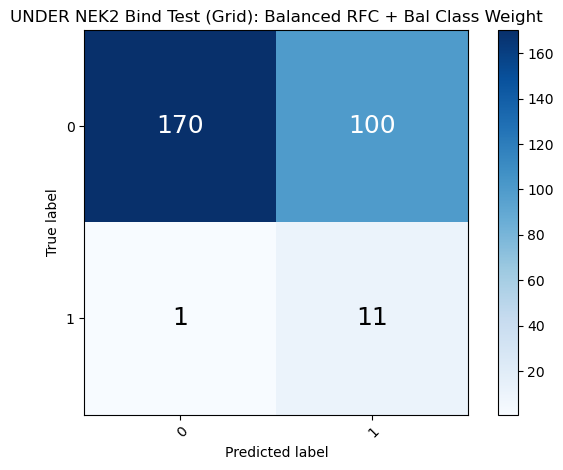

In [10]:
# the Balanced RFC was my best binding BRFC 
save_file = 'bind_moe_grid.pkl'
# grid_rf = find_best_models(train_x, train_y, test_x, test_y, 'BalancedRandomForestClassifier', {'class_weight':'balanced', 'bootstrap':True}, param_grid,  save_file4, 2)
# with open(save_file, 'wb') as f:
#         pickle.dump(grid_rf['best_model'], f)
with open('best_models/'+save_file, 'rb') as f: 
    grid_model = pickle.load(f) 
gridresults = rf_results2(grid_model, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridresults['test_pred'], ['0','1'], title='UNDER NEK2 Bind Test (Grid): Balanced RFC + Bal Class Weight')



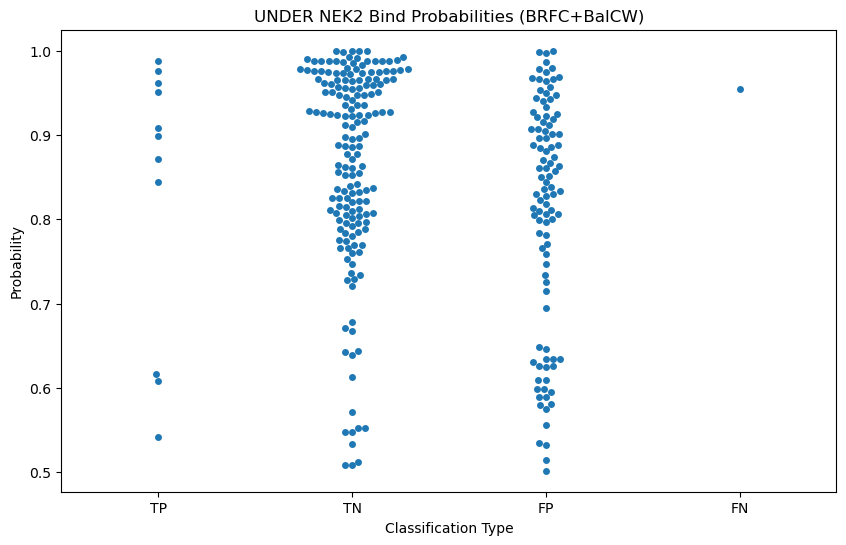

In [11]:
swarm_prob(grid_model, test_x, test_y, 'UNDER NEK2 Bind Probabilities (BRFC+BalCW)')